In [7]:
#David Rumford
#CS 4410
#Homework 6

In [8]:
#importing needed libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#get Hamlet text
!pip install requests
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

In [10]:
#tokenize the Hamlet text
blob = TextBlob(data)

In [11]:
#define stopwords
stop_words = set(nltk.corpus.stopwords.words("english"))

In [12]:
#get the word count
items = blob.word_counts.items()

In [13]:
#eliminate the stopwords
items = [item for item in items if item[0] not in stop_words]

In [14]:
#sort words by frequency
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [15]:
#get the top 20 words
top20 = sorted_items[1:21]

In [16]:
#convert top 20 words to a dataframe
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])
df

,word,count
0,lord,211
1,haue,175
2,king,173
3,shall,107
4,hamlet,106
5,come,106
6,thou,105
7,let,104
8,good,99
9,hor,95


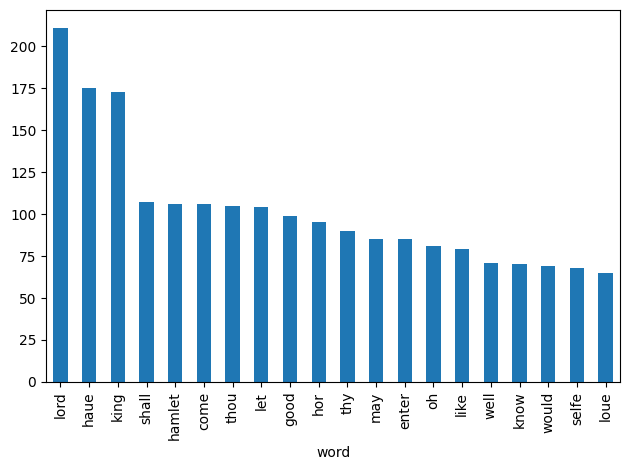

In [17]:
#visualize the dataframe with bar chart
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

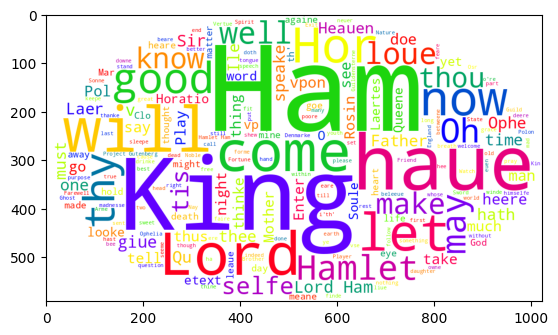

In [18]:
#generate a wordcloud
import imageio.v2 as imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(colormap='prism', background_color="white", mask=mask_image)
wordcloud = wordcloud.generate(data)
plt.imshow(wordcloud)